,Num.,Temperature,Vibration,information
Time,,,,
"(2022-04-28, 17:52:57)",0,37.6,0.00,-
"(2022-04-28, 17:52:53)",0,37.6,0.00,-
"(2022-04-28, 17:52:50)",0,37.6,0.01,-
"(2022-04-28, 17:52:47)",0,37.4,0.00,-
"(2022-04-28, 17:52:43)",0,37.4,0.00,-
...,...,...,...,...
"(2022-04-28, 15:24:54)",0,33.8,0.00,-
"(2022-04-28, 15:24:48)",0,33.8,0.00,-
"(2022-04-28, 15:24:43)",0,33.8,0.00,-


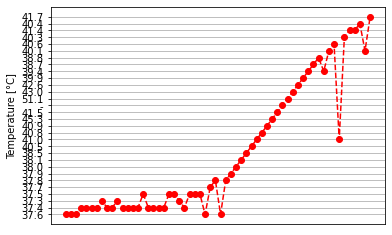

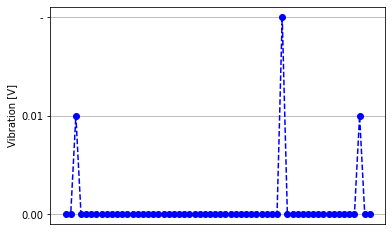

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

with open('2022-04-28server.log','r') as fp:
  fl = fp.readlines()[::-1]
  select = ':' #일자 정하기?
  f_out = []
  for i in range(len(fl)):
    if 'root' in fl[i] and select in fl[i]:
      f_out.append(fl[i])
    else:
      pass
    #데이터 정제
    date = []
    time = []
    product_num = []
    Temperature = []
    Vibration = []
    inform = []
    for line in f_out:
      if 'INFO' in line:
       words = line.split()
       date.append(words[0])
       time.append(words[1].split(',')[0])
       product_num.append(words[3])
       Temperature.append(words[7])
       Vibration.append(words[-1])
       inform.append('-')
      else:
        words = line.split()
        date.append(words[0])
        time.append(words[1].split(',')[0])
        product_num.append('-')
        Temperature.append('-')
        Vibration.append('-')

        info= " ".join(words[1:])
        info = info.split('-')
        info = "-".join(info[2:])
        inform.append(info)

date_time = zip(date, time) 
all_dict = {'Time':date_time, 'Num.': product_num, 'Temperature': Temperature, 'Vibration': Vibration, 'information': inform}
df = pd.DataFrame(all_dict)
display(df.set_index("Time"))

graph_l = 30
if len(time) <= 30:
  graph_l = len(time)
else:
  pass
  
plt.figure(1)
temp_fileName = "temp.png"
temp_plot = plt.plot([x for x in range(60)], Temperature[0:60],'ro--')
plt.ylabel("Temperature [°C]")
temp_ax = plt.gca()
temp_ax.axes.xaxis.set_visible(False)
temp_ax.grid(axis='y')
plt.savefig(temp_fileName)

plt.figure(2)
vib_fileName = "vib.png"
vib_plot = plt.plot([x for x in range(60)], Vibration[0:60],'bo--')
plt.ylabel("Vibration [V]")
vib_ax = plt.gca()
vib_ax.axes.xaxis.set_visible(False)
vib_ax.grid(axis='y')
plt.savefig(vib_fileName)